In [195]:
%run funcs.py
%matplotlib notebook

In [196]:
allpieces = {}
for i in range(0,len(parts),1):
    folder = basefile+'data/ind/'+parts[i]
    pieces = os.listdir(folder)
    allpieces['{0}'.format(parts[i])] = pieces

    
for key in allpieces:
    for i in range(0,32,1):
        allpieces[key][i] = allpieces[key][i][:-4]
        
pitches = os.listdir(basefile+'sound/pitch/')

In [197]:
allpieces.keys()

['10', '20', '18', '28', '1', '3', '2', '6', '9', '8']

In [198]:
'''Finding all pieces that have MelID bet 1 and 16'''
normMels = []
synMels = []
im = [1,2,3,4,17,18,19,20]
jo = [5,6,7,8,21,22,23,24]
sc = [9,10,11,12,25,26,27,28]
vo = [13,14,15,16,29,30,31,32]
alljo, allim, allsc, allvo = ([] for i in range(4))
s1,s2, s3 ,s4,s5,s6 = ([]for i in range(6))

folder = basefile+'data/datadump/'
pieces = os.listdir(folder)
for i in range(0,len(pieces),1):
    pieces[i] = pieces[i][:-4]
    melID = returnDetails(pieces[i])['melID']
    typeID = returnDetails(pieces[i])['typeID']
#    settostrat(pieces[i],typeID) #distribute according to piece ID
    if int(melID) <= 16:
        normMels.append(pieces[i]) 
    elif int(melID)>16:
        synMels.append(pieces[i])
    if int(melID) in im:
        allim.append(pieces[i])
    elif int(melID) in jo:
        alljo.append(pieces[i])
    elif int(melID) in sc:
        allsc.append(pieces[i])
    elif int(melID) in vo:
        allvo.append(pieces[i])

<IPython.core.display.Javascript object>


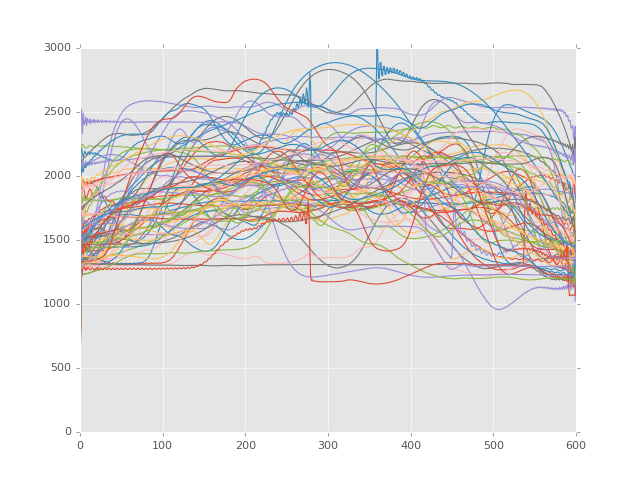

In [199]:
'''plot genre qoms'''
qomjo,qomvo,qomim,qomsc = ([]for i in range(4))
fig, ax1 = plt.subplots()
# for i in range(0,len(alljo)):
#     qomjo.append(qom(alljo[i]))
#     ax1.plot(qomjo[i])
# for i in range(0,len(allvo)):
#     qomvo.append(qom(allvo[i]))
#     ax1.plot(qomvo[i])
# for i in range(0,len(allsc)):
#     qomsc.append(qom(allsc[i]))
#     ax1.plot(qomsc[i])
for i in range(0,len(allim)):
    qomim.append(qom(allim[i]))
    ax1.plot(qomim[i])

<IPython.core.display.Javascript object>


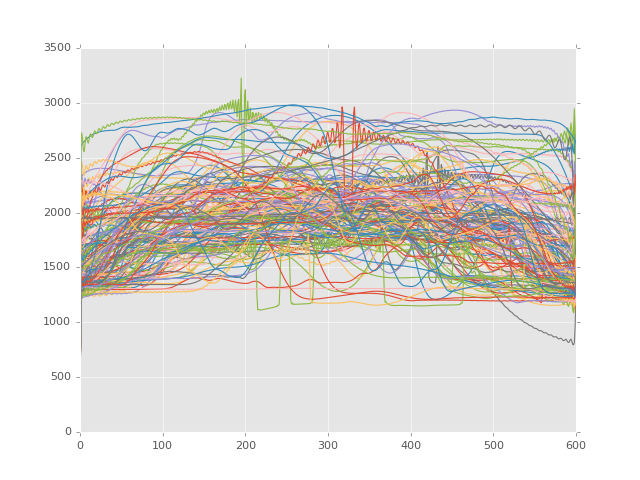

In [200]:
qomnorm = []
qomsyn = []
fig, ax2 = plt.subplots()
for i in range(0,len(synMels)):
    qomsyn.append(qom(synMels[i]))
    ax2.plot(qomsyn[i])

<IPython.core.display.Javascript object>


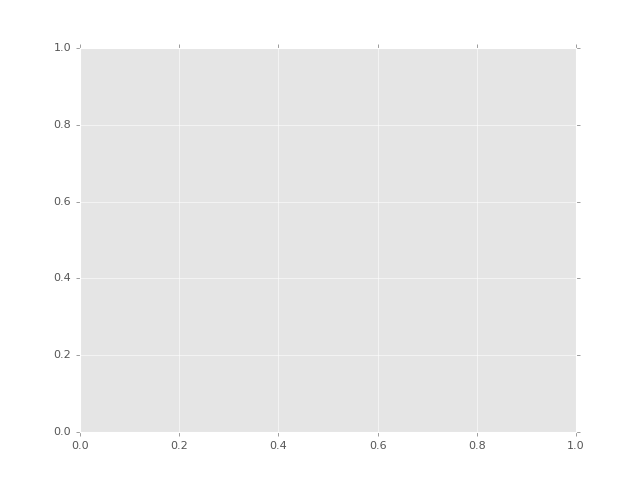

In [202]:
'''plot all qoms of strategies 1-6'''
qoms1,qoms2,qoms3,qoms4,qoms5,qoms6 = ([]for i in range(6))
fig, ax = plt.subplots()
for i in range(0,len(s1)):
    qoms1.append(qom(s1[i]))
    ax.plot(qoms1[i])
for i in range(0,len(s2)):
    qoms2.append(qom(s2[i]))
    ax.plot(qoms2[i])
for i in range(0,len(s3)):
    qoms3.append(qom(s3[i]))
    ax.plot(qoms3[i])
for i in range(0,len(s4)):
    qoms4.append(qom(s4[i]))
    ax.plot(qoms4[i])
for i in range(0,len(s5)):
    qoms5.append(qom(s5[i]))
    ax.plot(qoms5[i])
for i in range(0,len(s6)):
    qoms6.append(qom(s6[i]))
    ax.plot(qoms6[i])

In [203]:
'''plot all hands'''
# qomim[0]
# RHZ, RHY, RHX, LHZ, LHY, LHX = ([] for i in range(0,6))
# fig, ax3 = plt.subplots()
# fig, ax4 = plt.subplots()
# fig, ax5 = plt.subplots()
# fig, ax6 = plt.subplots()
# fig, ax7 = plt.subplots()
# fig, ax8 = plt.subplots()
# for i in range(0,len(pieces)):
#     RHZ.append(readfile(pieces[i])['RHZ'])
#     RHX.append(readfile(pieces[i])['RHX'])
#     RHY.append(readfile(pieces[i])['RHY'])
#     LHZ.append(readfile(pieces[i])['LHZ'])
#     LHX.append(readfile(pieces[i])['LHX'])
#     LHY.append(readfile(pieces[i])['LHY'])
#     ax3.plot(RHZ[i])
#     ax4.plot(RHX[i])
#     ax5.plot(RHY[i])
#     ax6.plot(LHZ[i])
#     ax7.plot(LHX[i])
#     ax8.plot(LHY[i])

# '''send all norm pieces to /data/normdatadump/'''
# for i in range(0,len(pieces)):
#     file_name = pieces[i]+'.csv'
#     y = upsamp(pieces[i])
#     y.to_csv(file_name,sep='\t')

'''normnorm'''

'normnorm'

<IPython.core.display.Javascript object>


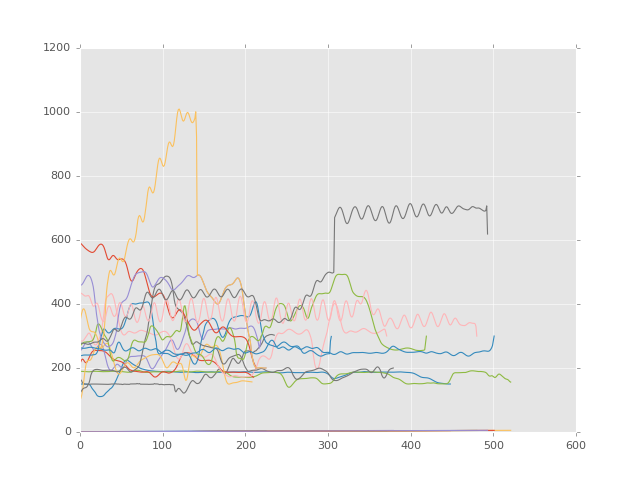

In [224]:
pitches = []
fig, ax9= plt.subplots()
for i in range(1,17,1):
    strings = str(i)+'.txt'
    pitches.append(readpitch(strings))
    
# for i in range(0,16,1):
#     pitches[i]['F0_Hz'] = ups(pitches[i])
    
for i in range(0,16,1):
    ax9.plot(pitches[i])

In [205]:
def qomnew(stri):
    fil = basefile+'data/normdatadump/'+stri+'.csv'
    df1=pd.read_table(fil,header=None)
    df1.columns=colHeads
    df = df1.iloc[:,2:]
    qomval = numpy.sqrt(numpy.square(df).sum(axis =1))
    return(qomval)

<IPython.core.display.Javascript object>


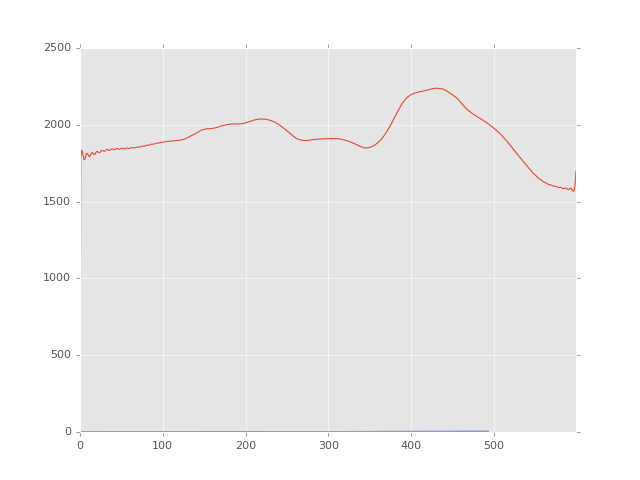

In [206]:
#one tracing interpolate and plot
fig,y = plt.subplots()
y.plot(ups(qomsyn[13]))


<IPython.core.display.Javascript object>


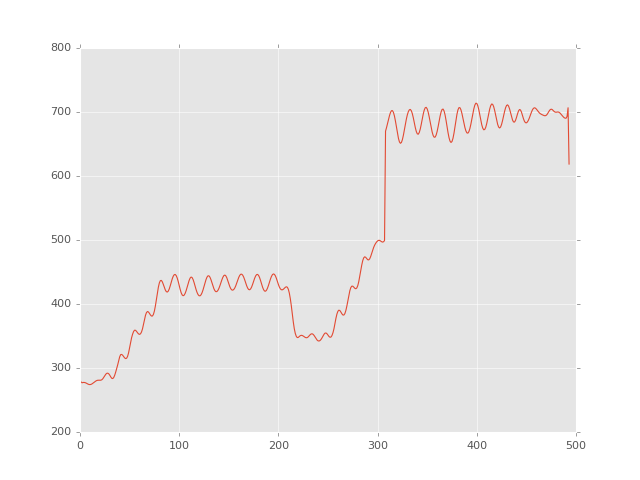

       Time_s       F0_Hz
0    0.024966  101.126622
1    0.034966  104.858163
2    0.044966  114.066251
3    0.054966  128.324389
4    0.064966  147.412769
5    0.074966  169.225799
6    0.084966  190.243496
7    0.094966  207.098565
8    0.104966  217.962781
9    0.114966  223.030004
10   0.124966  224.116401
11   0.134966  223.688077
12   0.144966  223.904654
13   0.154966  226.057645
14   0.164966  230.499691
15   0.174966  236.778109
16   0.184966  243.973577
17   0.194966  251.012510
18   0.204966  256.945195
19   0.214966  261.154432
20   0.224966  263.446961
21   0.234966  264.039398
22   0.244966  263.464799
23   0.254966  262.369440
24   0.264966  261.418003
25   0.274966  261.144690
26   0.284966  261.881536
27   0.294966  263.708697
28   0.304966  266.439061
29   0.314966  269.665850
..        ...         ...
179  1.814966  150.640679
180  1.824966  149.648677
181  1.834966  149.886757
182  1.844966  150.766145
183  1.854966  151.839948
184  1.864966  152.795866
185  1.87496

In [225]:
folder = basefile+'data/datadump/'
pieces = os.listdir(folder)
ax,y90 = plt.subplots()
pieces[i]
y90 = plt.plot(pitches[i]['F0_Hz'])



# for i in range(0,len(pieces),1):
#     pieces[i] = pieces[i][:-4]
#     melID = returnDetails(pieces[i])['melID']
#     typeID = returnDetails(pieces[i])['typeID']
#     settostrat(pieces[i],typeID) #distribute according to piece ID
#     if int(melID) <= 16:
#         normMels.append(pieces[i])